# basics of probability theory

In the context of a [course in Computational Neuroscience](http://invibe.net/LaurentPerrinet/Presentations/2017-03-06_cours-NeuroComp), I am teaching a basic introduction in [Probabilities, Bayes and the Free-energy principle](http://blog.invibe.net/files/2017-03-13_NeuroComp_FEP.html).

Let's learn to use probabilities in practice by generating some "synthetic data", that is by using the computer's number generator. 


<!-- TEASER_END -->



Let's begin with a dice:


## dice

In [1]:
import numpy as np
np

<module 'numpy' from '/usr/local/lib/python3.6/site-packages/numpy/__init__.py'>

In [2]:
np.random

<module 'numpy.random' from '/usr/local/lib/python3.6/site-packages/numpy/random/__init__.py'>

In [3]:
np.random.logistic

<function RandomState.logistic>

In [4]:
help(np.random.randint)

Help on built-in function randint:

randint(...) method of mtrand.RandomState instance
    randint(low, high=None, size=None, dtype='l')
    
    Return random integers from `low` (inclusive) to `high` (exclusive).
    
    Return random integers from the "discrete uniform" distribution of
    the specified dtype in the "half-open" interval [`low`, `high`). If
    `high` is None (the default), then results are from [0, `low`).
    
    Parameters
    ----------
    low : int
        Lowest (signed) integer to be drawn from the distribution (unless
        ``high=None``, in which case this parameter is one above the
        *highest* such integer).
    high : int, optional
        If provided, one above the largest (signed) integer to be drawn
        from the distribution (see above for behavior if ``high=None``).
    size : int or tuple of ints, optional
        Output shape.  If the given shape is, e.g., ``(m, n, k)``, then
        ``m * n * k`` samples are drawn.  Default is None, i

In [5]:
np.random.randint(6, size=10)

array([5, 4, 2, 5, 3, 5, 5, 0, 4, 1])

## a note on RNGs

On a computer, randomness is (possibly) deterministic !


In [6]:
np.random.randint(6, size=10)

array([3, 3, 0, 3, 4, 4, 3, 1, 4, 3])

In [7]:
np.random.seed(42)
np.random.randint(6, size=10)

array([3, 4, 2, 4, 4, 1, 2, 2, 2, 4])

In [8]:
np.random.seed(43)
np.random.randint(6, size=10)

array([4, 0, 1, 5, 2, 0, 3, 1, 3, 3])

In [9]:
np.random.seed(42)
np.random.randint(6, size=10)

array([3, 4, 2, 4, 4, 1, 2, 2, 2, 4])

In [10]:
np.random.seed(None)
np.random.randint(6, size=10)

array([1, 5, 2, 1, 0, 4, 0, 2, 1, 1])

## coin

In [11]:
result = np.random.randint(2, size=10)
print(result)

[1 1 0 1 1 0 1 1 0 1]


In [12]:
result.mean(), result.std(), result.var()

(0.69999999999999996, 0.45825756949558394, 0.20999999999999996)

In [13]:
N = 1000
result = np.random.randint(2, size=N)
print('Mean ', result.mean(), ', std ', result.std())

Mean  0.495 , std  0.499974999375


In [14]:
N = 1000
N_trials = 100
result = np.random.randint(2, size=(N, N_trials))
print('Mean ', result.mean(axis=0), ', std ', result.mean(axis=0).std())

Mean  [ 0.54   0.516  0.475  0.501  0.498  0.505  0.488  0.499  0.495  0.498
  0.512  0.503  0.515  0.512  0.501  0.504  0.491  0.465  0.475  0.49
  0.496  0.508  0.508  0.498  0.51   0.49   0.519  0.495  0.503  0.521
  0.513  0.492  0.455  0.474  0.509  0.507  0.49   0.489  0.494  0.493
  0.509  0.497  0.494  0.495  0.482  0.514  0.493  0.494  0.501  0.517
  0.492  0.525  0.507  0.501  0.483  0.501  0.497  0.469  0.49   0.515  0.5
  0.487  0.49   0.488  0.502  0.499  0.495  0.49   0.538  0.5    0.499
  0.513  0.508  0.5    0.491  0.492  0.516  0.481  0.503  0.518  0.514
  0.487  0.497  0.489  0.489  0.523  0.498  0.491  0.495  0.526  0.5    0.513
  0.482  0.507  0.488  0.489  0.487  0.501  0.485  0.509] , std  0.0140053239877


In [15]:
print('Grand average=', result.mean())

Grand average= 0.49903


In [16]:
%matplotlib inline
import matplotlib.pyplot as plt

Mean  [ 0.511  0.52   0.528  0.508  0.488  0.516  0.498  0.501  0.495  0.489
  0.507  0.486  0.509  0.503  0.539  0.515  0.519  0.5    0.495  0.505
  0.489  0.501  0.512  0.507  0.479  0.502  0.525  0.489  0.514  0.498
  0.494  0.533  0.506  0.518  0.519  0.509  0.486  0.51   0.483  0.52
  0.496  0.482  0.503  0.495  0.456  0.526  0.499  0.464  0.539  0.521
  0.482  0.505  0.477  0.521  0.518  0.499  0.51   0.511  0.5    0.494
  0.496  0.502  0.497  0.486  0.51   0.486  0.536  0.493  0.497  0.512
  0.527  0.512  0.492  0.53   0.487  0.479  0.493  0.5    0.521  0.478
  0.51   0.475  0.522  0.498  0.508  0.486  0.487  0.511  0.52   0.49
  0.498  0.504  0.495  0.499  0.503  0.508  0.499  0.502  0.477  0.5  ] , std  0.0157819517171


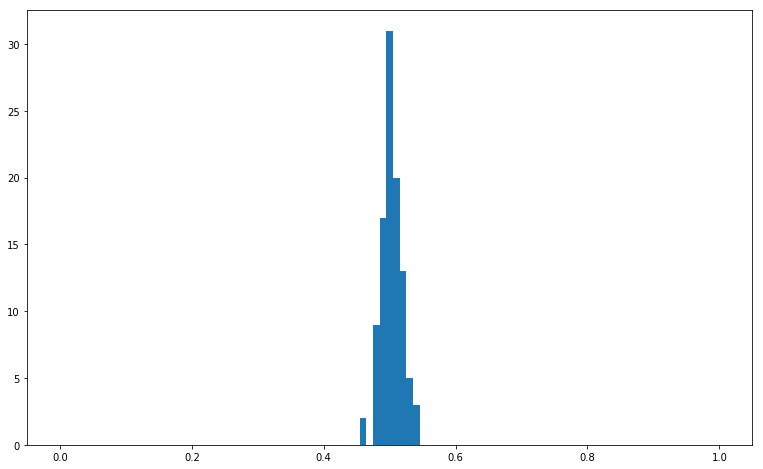

In [17]:
N = 1000
N_trials = 100
result = np.random.randint(2, size=(N, N_trials))
print('Mean ', result.mean(axis=0), ', std ', result.mean(axis=0).std())
fig, ax = plt.subplots(figsize=(13, 8))
ax.hist(result.mean(axis=0), bins=np.linspace(0, 1, 100));

Mean  [ 0.479  0.503  0.497  0.504  0.498  0.501  0.529  0.495  0.523  0.496
  0.527  0.486  0.495  0.506  0.498  0.53   0.509  0.487  0.483  0.511
  0.485  0.526  0.491  0.483  0.496  0.477  0.515  0.519  0.509  0.517
  0.505  0.497  0.515  0.517  0.506  0.504  0.491  0.482  0.528  0.5    0.526
  0.517  0.485  0.497  0.495  0.518  0.482  0.502  0.489  0.499  0.512
  0.511  0.475  0.525  0.501  0.486  0.496  0.492  0.466  0.474  0.515
  0.507  0.477  0.504  0.516  0.52   0.48   0.511  0.48   0.482  0.486
  0.493  0.501  0.535  0.466  0.517  0.505  0.499  0.529  0.499  0.49
  0.501  0.503  0.497  0.521  0.499  0.511  0.5    0.474  0.482  0.48
  0.508  0.509  0.498  0.489  0.515  0.516  0.516  0.486  0.524] , std  0.0157702853494


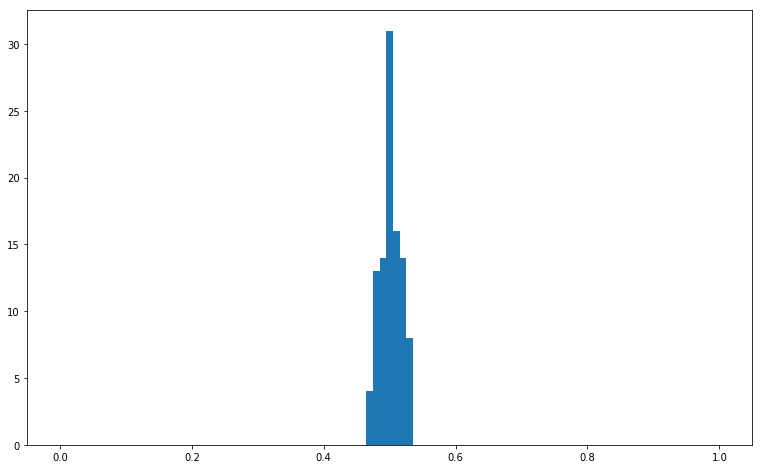

In [18]:
N = 1000
N_trials = 100
result = np.random.randint(2, size=(N, N_trials))
print('Mean ', result.mean(axis=0), ', std ', result.mean(axis=0).std())
fig, ax = plt.subplots(figsize=(13, 8))
ax.hist(result.mean(axis=0), bins=np.linspace(0, 1, 100));

Mean  [ 0.5011  0.5041  0.5005  0.5067  0.5032  0.4995  0.4971  0.4955  0.5015
  0.5007  0.494   0.5011  0.5096  0.4999  0.5026  0.4957  0.501   0.5026
  0.4958  0.5032  0.4963  0.5     0.5026  0.5034  0.4952  0.5011  0.4997
  0.5093  0.4984  0.5014  0.4954  0.4989  0.4913  0.5009  0.5028  0.493
  0.4945  0.4978  0.4915  0.5052  0.4921  0.5     0.5025  0.4997  0.4981
  0.4974  0.5049  0.4991  0.5078  0.5018  0.4962  0.4976  0.498   0.5034
  0.5003  0.4972  0.5028  0.5005  0.5024  0.4973  0.4928  0.5032  0.4942
  0.499   0.5004  0.4912  0.5016  0.5043  0.4966  0.5007  0.4991  0.5002
  0.4989  0.5114  0.4995  0.5002  0.5009  0.5028  0.5035  0.4974  0.5052
  0.4942  0.498   0.5001  0.5051  0.4962  0.4843  0.499   0.496   0.4992
  0.5033  0.4913  0.5043  0.4986  0.5018  0.4934  0.4963  0.5063  0.5065
  0.5078] , std  0.00448078118189


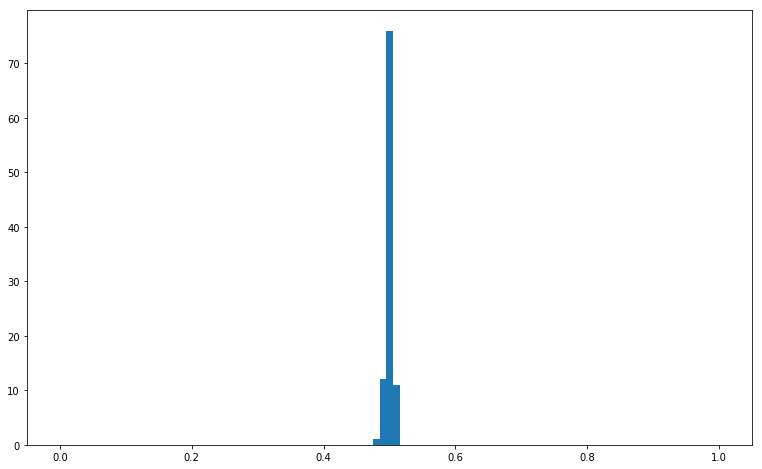

In [19]:
N = 10000
N_trials = 100
result = np.random.randint(2, size=(N, N_trials))
print('Mean ', result.mean(axis=0), ', std ', result.mean(axis=0).std())
fig, ax = plt.subplots(figsize=(13, 8))
ax.hist(result.mean(axis=0), bins=np.linspace(0, 1, 100));

Mean  [ 0.56  0.5   0.52  0.48  0.42  0.5   0.5   0.53  0.47  0.46  0.51  0.46
  0.46  0.45  0.52  0.47  0.52  0.41  0.43  0.49  0.51  0.58  0.47  0.47
  0.57  0.44  0.44  0.52  0.56  0.46  0.55  0.54  0.47  0.52  0.51  0.57
  0.43  0.56  0.51  0.51  0.58  0.54  0.44  0.44  0.55  0.47  0.52  0.47
  0.52  0.47  0.57  0.52  0.46  0.47  0.58  0.5   0.48  0.47  0.42  0.5
  0.52  0.51  0.49  0.49  0.53  0.45  0.53  0.5   0.54  0.52  0.56  0.49
  0.54  0.53  0.42  0.45  0.5   0.4   0.43  0.55  0.56  0.49  0.46  0.46
  0.5   0.61  0.52  0.57  0.51  0.56  0.56  0.53  0.49  0.51  0.4   0.56
  0.51  0.51  0.49  0.45] , std  0.0459995652153


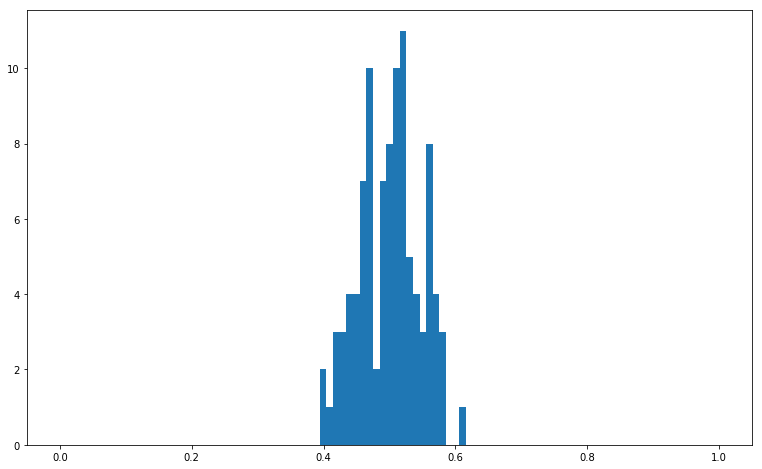

In [20]:
N = 100
N_trials = 100
result = np.random.randint(2, size=(N, N_trials))
print('Mean ', result.mean(axis=0), ', std ', result.mean(axis=0).std())
fig, ax = plt.subplots(figsize=(13, 8))
ax.hist(result.mean(axis=0), bins=np.linspace(0, 1, 100));

## normal variable

Mean  [ 0.50195  0.49787  0.50032 ...,  0.50307  0.49871  0.49993] , std  0.00160510109458


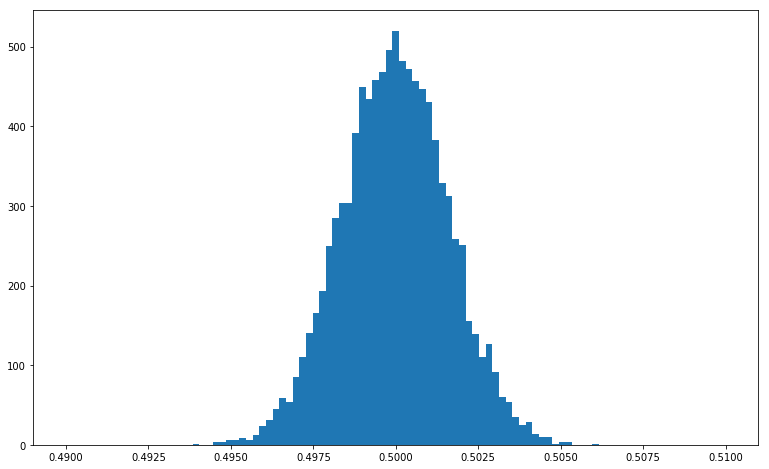

In [21]:
N = 100000
N_trials = 10000
result = np.random.randint(2, size=(N, N_trials))
print('Mean ', result.mean(axis=0), ', std ', result.mean(axis=0).std())
fig, ax = plt.subplots(figsize=(13, 8))
ax.hist(result.mean(axis=0), bins=np.linspace(0.49, .51, 100));

Central limit theorem:

Over multiple measurements, the average of an identical random variable converges to a normal law :
$$
p (x) = \frac {1} { \sqrt{ 2\pi } \sigma} \cdot \exp{(- \frac {1} {2} \cdot \frac {(x - m)^2} {\sigma^2} )}
$$

(moreover, we know from this theorem that the asymptotic mean is the mean or the rv and that the variance decreases inversely proportionally with the number of measurements)

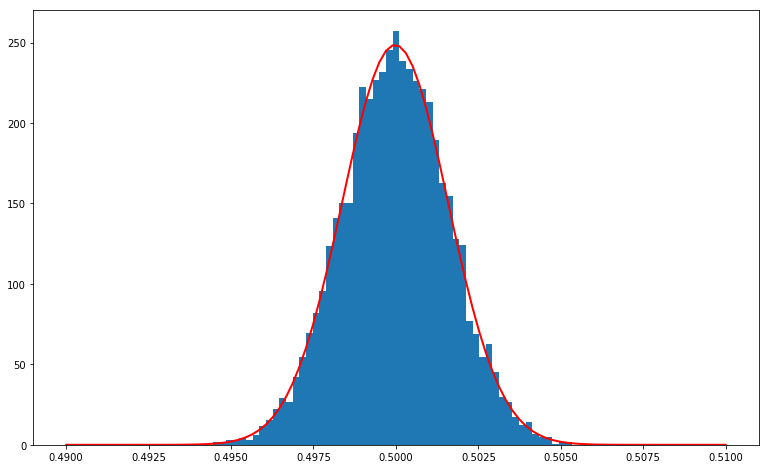

In [22]:
mean  = result.mean(axis=0).mean()
std  = result.mean(axis=0).std()
bins = np.linspace(0.49, .51, 100)

fig, ax = plt.subplots(figsize=(13, 8))
ax.hist(result.mean(axis=0), bins=bins, normed=True)
ax.plot(bins, 1 / np.sqrt(2*np.pi) / std * np.exp(-.5*(bins-mean)**2/std**2), 'r', lw=2 );

The central limit theorem works with all forms of random variables:

In [23]:
N = 100000
N_trials = 1000
result = np.random.rand(N, N_trials)
print(result)

[[ 0.44869862  0.57662481  0.18603079 ...,  0.15279605  0.59446338
   0.57548346]
 [ 0.17774894  0.49783666  0.27971604 ...,  0.62650323  0.43497046
   0.14628423]
 [ 0.55741204  0.06820418  0.68217069 ...,  0.69438983  0.56086557
   0.0021194 ]
 ..., 
 [ 0.29663497  0.24120372  0.57932703 ...,  0.89435831  0.5468314
   0.07252068]
 [ 0.88196308  0.37744147  0.2177457  ...,  0.02152461  0.77621035
   0.50561815]
 [ 0.61974228  0.08479278  0.48558868 ...,  0.91904245  0.18800096
   0.63077166]]


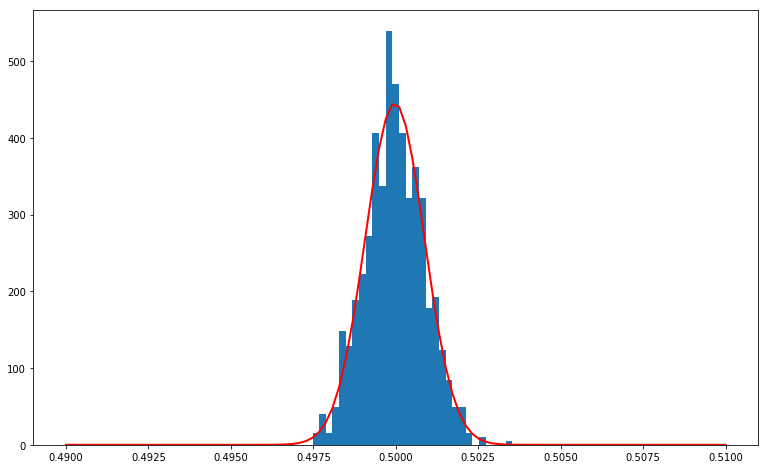

In [24]:
mean  = result.mean(axis=0).mean()
std  = result.mean(axis=0).std()
bins = np.linspace(0.49, .51, 100)

fig, ax = plt.subplots(figsize=(13, 8))
ax.hist(result.mean(axis=0), bins=bins, normed=True)
ax.plot(bins, 1 / np.sqrt(2*np.pi) / std * np.exp(-.5*(bins-mean)**2/std**2), 'r', lw=2 );

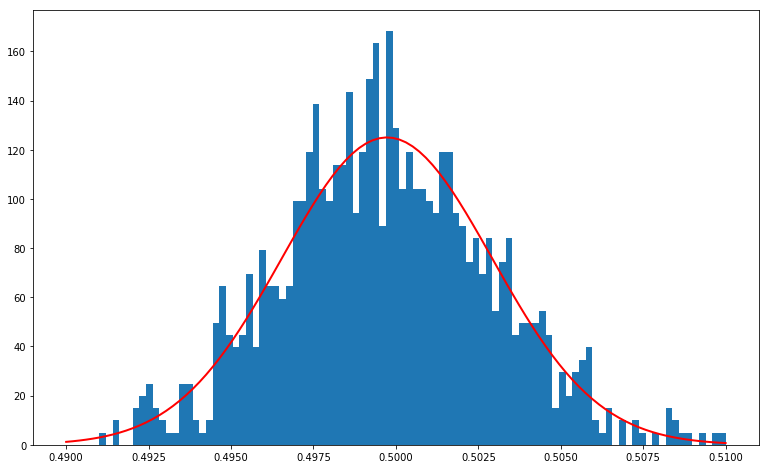

In [25]:
N = 100000
N_trials = 1000
result = np.random.randn(N, N_trials) + .5

mean  = result.mean(axis=0).mean()
std  = result.mean(axis=0).std()
bins = np.linspace(0.49, .51, 100)

fig, ax = plt.subplots(figsize=(13, 8))
ax.hist(result.mean(axis=0), bins=bins, normed=True)
ax.plot(bins, 1 / np.sqrt(2*np.pi) / std * np.exp(-.5*(bins-mean)**2/std**2), 'r', lw=2 );